LAB 1 DISTANCE DEPENDENTS OF RADIATION
Diego McHenry
Partner: Julia Gelfond
February 5, 2024

Introduction: We will use a Geiger-Mueller counter to measure radiation at a variety of distances to find the relations between the two.

Set Up: Our Geiger-Mueller counter is attatched to a Lab quest which is connected to a computer so we can read the measurements. The GM counter is clamped in place with the apparatus shown to ensure that its height does not change during each reading. We had a cesium puck to use as a radiation source and a plumbob to help with proper set up: it helped us center our puck directly below our GM. We will start by measuring the ambient radiation so later when measuring the radiation from the cesium we can tell how much is from environment other than the cesium.
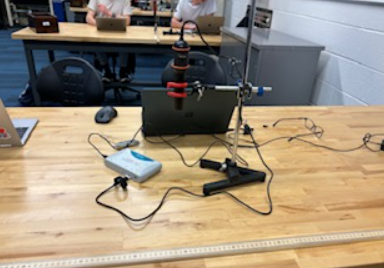


Data:
We started by measuring the radiation counts of the ambient environment.

In [1]:
#importing all potentioally necessary mods
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

ambient = pd.read_excel("data/bg.xlsx")
#radiation in the room without influence from Cs


Next we measured the radiation count from the cesium and room at various distances from the GM.


In [2]:
data = pd.read_excel("data/data.xlsx")
data

,Distance (m),Radiation (counts)
0,0.185,133
1,0.164,191
2,0.130,318
3,0.104,471
4,0.074,981
5,0.080,829
6,0.053,1912
7,0.031,5497
8,0.037,3999
9,0.020,10177


Analysis:
The analysis will consist of the organization and manipulation of data to analyze the relationship between distance and radiation count.

First, to adjust for the background radiation, the average of the ambient radiation measurements is subracted from the measured Cs radiation counts.



In [3]:
#Average of ambient radiation to be subracted from Radiation to isolate radiation from Cs
Acounts = ambient['Radiation (counts)']

amav = Acounts.mean()

In [4]:
#A new column is created for the Isolated Cs radiation measurements
data['Radiation (counts from Cs)'] = data['Radiation (counts)']-amav

The data  as collected was quite messy and out of order, so adjustments are made to organize the data for presentation.

In [5]:
#lets sort the data a bit
data = data.sort_values(by=['Radiation (counts from Cs)'])
#and get an error for the Radiation counts using the square root rule
data['sqrt (Radiation Counts Cs)']=[math.sqrt(i) for i in data['Radiation (counts from Cs)']]

In [14]:
#Define a model to determine the values for our equation
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data['Distance (m)'],
                            data['Radiation (counts from Cs)'],
                            sigma=data['sqrt (Radiation Counts Cs)'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(fitA, fitdA)
print(fitB, fitdB)

7.261874772764983 0.2562520427241059
-1.8741392871851565 0.010174782684469943


Text(0.5, 1.0, 'Radiation Counts vs Distance (m)')

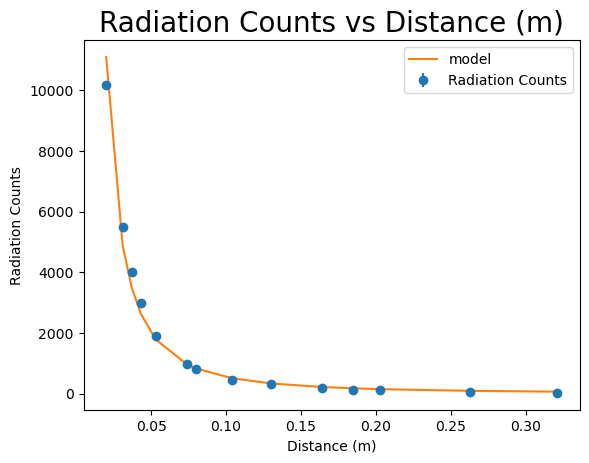

In [7]:
#graph the data and model to get a visual
plt.errorbar(data['Distance (m)'], data['Radiation (counts from Cs)'], yerr=data['sqrt (Radiation Counts Cs)'], 
             fmt="o", label='Radiation Counts')
plt.plot(data['Distance (m)'], linmodel(data['Distance (m)'], 
                                                   fitA, fitB), label='model')
#make it pretty :)
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Radiation Counts')
plt.title('Radiation Counts vs Distance (m)', fontsize = 20)

#Error bars included but not visible

Our power model is as follows: N = 7.26 * d^-1.87. Now, we need to make a linear model.

In [8]:
#Take the natural log of the variables N (radiation counts) and d (distance)
data['ln N']=[math.log(i) for i in data['Radiation (counts from Cs)']]


In [9]:
data['ln d']=[math.log(i) for i in data['Distance (m)']]

Before we make our next graph we must also do some error propogation

In [10]:
data['ln up']=[math.log(i) for i in (data['Radiation (counts from Cs)']+ data['sqrt (Radiation Counts Cs)'])]


data['ln down']=[math.log(i) for i in (data['Radiation (counts from Cs)']- data['sqrt (Radiation Counts Cs)'])]

In [11]:
#now we have linear data
data
#Here is an over view said data which will be represented graphically
#This is a fairly large data set, but I feel as though it must be included as a form of hourse keeping.
'''ln up and down represent the new error after propogation for the natural log functions
The values they contain are the upper and lower bounds of the values after the natural log
has been taken'''

'ln up and down represent the new error after propogation for the natural log functions\nThe values they contain are the upper and lower bounds of the values after the natural log\nhas been taken'

In [12]:
#define an equation for our second model. It should be linear.
def linmodel2(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel2, data['ln d'],
                                            data['ln N'], sigma=None,
                                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#variable values for the second model
print(fitA, fitdA)
print(fitB, fitdB)

-2.1282929035648945 0.3239273634971514
1.2330520108698992 0.825614794692155


Text(0.5, 1.0, 'ln(Radiation Counts) vs ln(Distance (m))')

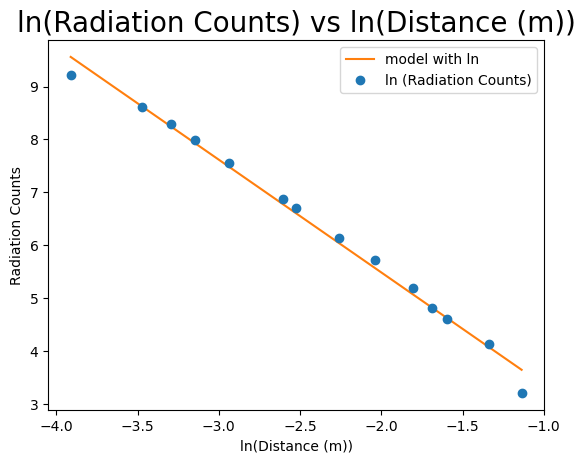

In [13]:
#graph the data
plt.errorbar(data['ln d'], data['ln N'], fmt="o", label='ln (Radiation Counts)')

'''y error not included because I could not figure out how to let there be different 
values for error in the positive and negative directions. They are different due to
the error propogation with the natural logs. Additionally, I realized too late that
I do not know how to find and r squared value'''

plt.plot(data['ln d'], linmodel2(data['ln d'], fitA, fitB), label='model with ln')
plt.legend()
plt.xlabel('ln(Distance (m))')
plt.ylabel('Radiation Counts')
plt.title('ln(Radiation Counts) vs ln(Distance (m))', fontsize = 20)

 The natural log successfully linearized our data: our model is of the formula y = -2.13x + 1.23                                        

Here are the two equations we end with :                                                                                        N = 7.26 [+/- .26] * d^-1.87 [+/- .01]  ______________ ln(N) = -2.13[+/- .32]*ln(d) + 1.23[+/- .83]                          

Error: We have a list of values for our propogated error due to the random nature of the eperiment listed in the table above.
Our data for this lab looked pretty good. The propogated error is the error only due to random counts. Possible additional sourse follow. A small source of random error was the positioning of our Cesium puck as it was difficult to put it directly below the GE even with the help of the plumbob. A similar error source may have occured with the measurement of the height of the GE: it was difficult to precisely measure with a ruler without disturbing the set up.

Results: Before the lab we theoretically predicted that the "B" value or exponent on the distance component should be -2. This means that as distance increases, the radiation intensity decreases geometrically as the inverse of the distance squared. This holds up fairly well in the lab as both measured values are only .13 away. This gives us a percent error of about 6.5%.